In [3]:
import numpy as np 
import matplotlib.pyplot as plt 

In [4]:
#Constants
G = 6.67430e-11

#Masses[Kg]
m_sun = 1.98847e30
m_mercury = 0.330103e24
m_venus = 4.86731e24
m_earth = 5.97217e24
m_mars = 0.641691e24
m_jupiter = 1898.125e24
m_saturn = 568.317e24
m_uranus = 86.8099e24
m_neptune = 102.4092e24

#Basic Vectors
r_sun = np.array([0.0, 0.0, 0.0])
v_sun = np.array([0.0, 0.0, 0.0])

r_mercury = np.array([5.7909e10, 0.0, 0.0])
v_mercury = np.array([0.0, 47360.0, 0.0])

r_venus = np.array([1.0816e11, 0.0, 0.0])
v_venus = np.array([0.0, 35020.0, 0.0])

r_earth = np.array([1.4960e11, 0.0, 0.0])
v_earth = np.array([0.0, 29780.0, 0.0])

r_mars = np.array([2.2794e11, 0.0, 0.0])
v_mars = np.array([0.0, 24070.0, 0.0])

r_jupiter = np.array([7.7834e11, 0.0, 0.0])
v_jupiter = np.array([0.0, 13060.0, 0.0])

r_saturn = np.array([1.4267e12, 0.0, 0.0])
v_saturn = np.array([0.0, 9680.0, 0.0])

r_uranus = np.array([2.8707e12, 0.0, 0.0])
v_uranus = np.array([0.0, 6800.0, 0.0])

r_neptune = np.array([4.4984e12, 0.0, 0.0])
v_neptune = np.array([0.0, 5430.0, 0.0])

In [29]:
#Vector of State
S = np.array([
    [r_sun, v_sun],
    [r_mercury, v_mercury],
    [r_venus, v_venus],
    [r_earth, v_earth],
    [r_mars, v_mars],
    [r_jupiter, v_jupiter],
    [r_saturn, v_saturn],
    [r_uranus, v_uranus],
    [r_neptune, v_neptune]], dtype = float)

#Vector of State Derivates
masses = [m_sun, m_mercury, m_venus, m_earth, m_mars, m_jupiter, m_saturn, m_uranus, m_neptune]

def derivates(S, masses):
  dSdt = np.zeros_like(S)
  n_bodies = len(masses)

  for i in range(n_bodies):
    dSdt[i,0] = S[i,1]
    a_sum = np.array([0.0,0.0,0.0])
    for j in range(n_bodies):
      if i != j:
        r_vector = S[i,0] - S[j,0]
        r_mag = np.linalg.norm(r_vector)
        a_sum += -G*masses[j]*r_vector/r_mag**3

    dSdt[i,1] = a_sum
  return dSdt

In [ ]:
#RK4 Method

def RK4(S, masses, dt):
  k1 = derivates(S, masses)
  k2 = derivates(S + k1*dt/2, masses)
  k3 = derivates(S + k2*dt/2, masses)
  k4 = derivates(S + sk3*dt, masses)

  S_n = S + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)
  return S_n

In [58]:
#Simulation
dt = 3600
n = 1461
history = []
S_f = S.copy()

for _ in range(n):
    S_f = RK4(S_f, masses, dt)
    history.append(S_f.copy())

S_f = np.array(history)

In [8]:
#Simulation 2
dt = 3600
n = 51900
history = []
S_f2 = S.copy()

for _ in range(n):
    S_f2 = RK4(S_f2, masses, dt)
    history.append(S_f2.copy())

S_f2 = np.array(history)


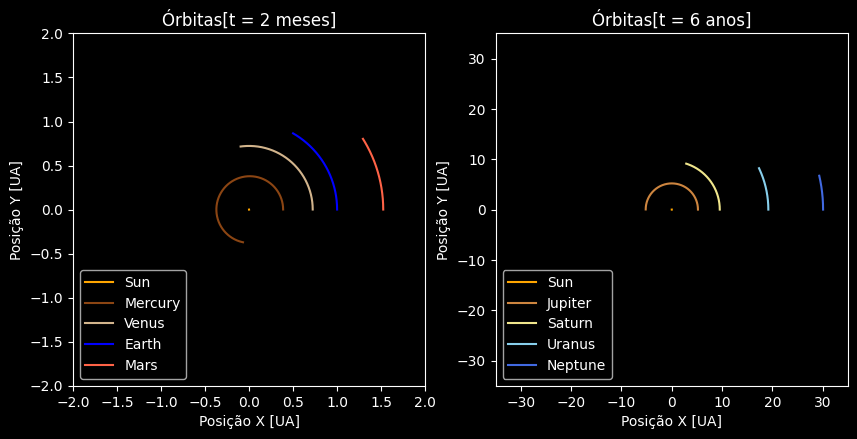

In [59]:
#2D Plot
UA = 1.496e11

x_sun = S_f[:, 0, 0, 0]/UA
y_sun = S_f[:, 0, 0, 1]/UA

x_mercury = S_f[:, 1, 0, 0]/UA
y_mercury = S_f[:, 1, 0, 1]/UA

x_venus = S_f[:, 2, 0, 0]/UA
y_venus = S_f[:, 2, 0, 1]/UA

x_earth = S_f[:, 3, 0, 0]/UA
y_earth = S_f[:, 3, 0, 1]/UA

x_mars = S_f[:, 4, 0, 0]/UA
y_mars = S_f[:, 4, 0, 1]/UA

x_jupiter = S_f2[:, 5, 0, 0]/UA
y_jupiter = S_f2[:, 5, 0, 1]/UA

x_saturn = S_f2[:, 6, 0, 0]/UA
y_saturn = S_f2[:, 6, 0, 1]/UA

x_uranus = S_f2[:, 7, 0, 0]/UA
y_uranus = S_f2[:, 7, 0, 1]/UA

x_neptune = S_f2[:, 8, 0, 0]/UA
y_neptune = S_f2[:, 8, 0, 1]/UA

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,20))
plt.style.use('dark_background')
ax1.set_xlim(-2,2)
ax1.set_ylim(-2,2)
ax1.set_aspect('equal')
ax2.set_xlim(-35,35)
ax2.set_ylim(-35,35)
ax2.set_aspect('equal')

#Sun
plt.style.use('dark_background')
ax1.plot(x_sun, y_sun, label = 'Sun', color = "orange")
ax2.plot(x_sun, y_sun, label = 'Sun', color = "orange")

#Rock Planets
ax1.plot(x_mercury, y_mercury, label = 'Mercury', color = "saddlebrown")
ax1.plot(x_venus, y_venus, label = "Venus", color = "tan")
ax1.plot(x_earth, y_earth, label = "Earth", color = "blue")
ax1.plot(x_mars, y_mars, label="Mars", color="tomato")

#Gas Planets
ax2.plot(x_jupiter, y_jupiter, label="Jupiter", color="peru")
ax2.plot(x_saturn, y_saturn, label="Saturn", color="khaki")
ax2.plot(x_uranus, y_uranus, label="Uranus", color="skyblue")
ax2.plot(x_neptune, y_neptune, label="Neptune", color="royalblue")

ax1.set_xlabel("Posição X [UA]")
ax1.set_ylabel("Posição Y [UA]")
ax1.legend(loc = 'lower left')
ax1.set_title("Órbitas[t = 2 meses]")

ax2.set_xlabel("Posição X [UA]")
ax2.set_ylabel("Posição Y [UA]")
ax2.legend(loc = 'lower left')
ax2.set_title("Órbitas[t = 6 anos]")

plt.show()

In [95]:
#Energy Conservation Measurement 
m0 = np.array(masses, dtype = float)
m = m0[1:]

#v0 = np.array([v_sun,v_mercury,v_venus,v_earth,v_mars,v_jupiter,v_saturn, v_uranus,v_neptune])
#v = np.linalg.norm(v0, axis=1)

v1_vectorial = S_f[:,1:,1,:]
v1_scalar = np.linalg.norm(v1_vectorial, axis = 2)
r1_vectorial = S_f[:,1:,0,:]
r1_scalar = np.linalg.norm(r1_vectorial, axis = 2)

K = 0.5*m*v1_scalar**2
U = - G*m_sun*m/r1_scalar
E = K + U

print(E)

[[-3.86328019e+32 -2.98773990e+33 -2.64995853e+33 ... -2.62404336e+34
  -2.00629751e+33 -1.51161971e+33]
 [-3.86328019e+32 -2.98773990e+33 -2.64995853e+33 ... -2.62404336e+34
  -2.00629751e+33 -1.51161971e+33]
 [-3.86328019e+32 -2.98773991e+33 -2.64995853e+33 ... -2.62404336e+34
  -2.00629751e+33 -1.51161971e+33]
 ...
 [-3.86323852e+32 -2.98807174e+33 -2.65009869e+33 ... -2.62401627e+34
  -2.00629566e+33 -1.51161937e+33]
 [-3.86323687e+32 -2.98807214e+33 -2.65009891e+33 ... -2.62401624e+34
  -2.00629566e+33 -1.51161937e+33]
 [-3.86323521e+32 -2.98807255e+33 -2.65009913e+33 ... -2.62401620e+34
  -2.00629566e+33 -1.51161937e+33]]


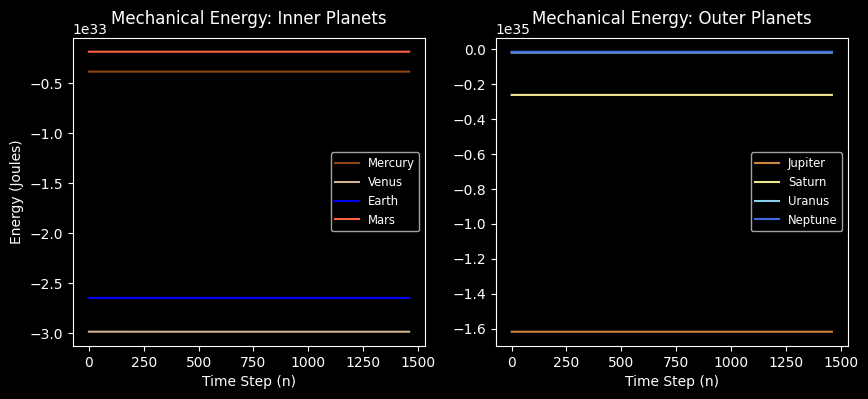

In [140]:
#Energy over Time 
t = np.arange(n)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,4))
plt.style.use('dark_background')

ax1.plot(t, E[:, 0], label='Mercury', color='saddlebrown')
ax1.plot(t, E[:, 1], label='Venus', color='tan')
ax1.plot(t, E[:, 2], label='Earth', color='blue')
ax1.plot(t, E[:, 3], label='Mars', color='tomato')
ax1.set_title("Mechanical Energy: Inner Planets", fontsize=12, pad=10)
ax1.set_xlabel("Time Step (n)", fontsize=10)
ax1.set_ylabel("Energy (Joules)", fontsize=10)
ax1.legend(loc='center right', fontsize='small', frameon=True)


ax2.plot(t, E[:, 4], label='Jupiter', color='peru')
ax2.plot(t, E[:, 5], label='Saturn', color='khaki')
ax2.plot(t, E[:, 6], label='Uranus', color='skyblue')
ax2.plot(t, E[:, 7], label='Neptune', color='royalblue')
ax2.set_title("Mechanical Energy: Outer Planets", fontsize=12, pad=10)
ax2.set_xlabel("Time Step (n)", fontsize=10)
ax2.legend(loc='center right', fontsize='small', frameon=True)

Mean Percentual Error: 0.001432%


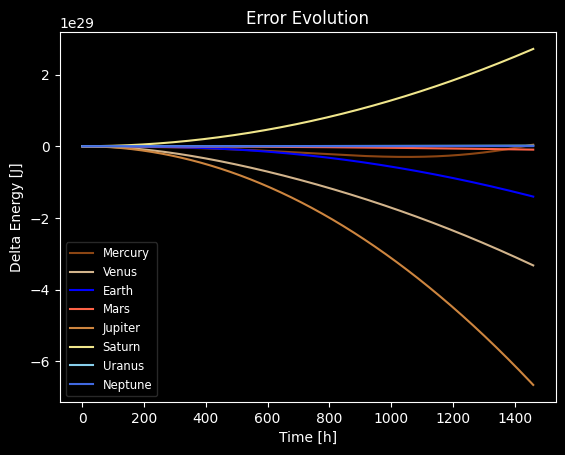

In [139]:
#Error Evolution 
error = np.array(E[:,:]-E[0,:])

planet_colors = ["saddlebrown", # 0: Mercury
    "tan",         # 1: Venus
    "blue",        # 2: Earth
    "tomato",      # 3: Mars
    "peru",        # 4: Jupiter
    "khaki",       # 5: Saturn
    "skyblue",     # 6: Uranus
    "royalblue" ] # 7: Neptune

planet_names = ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune"]

for i in range(8):
    plt.plot(t, error[:, i], 
             color=planet_colors[i], 
             label=planet_names[i], 
             linewidth=1.5)
plt.legend(loc='lower left', fontsize='small', framealpha=0.2)
plt.title('Error Evolution')
plt.xlabel('Time [h]')
plt.ylabel('Delta Energy [J]')

#Percentual Error 
mean_percentual_error = np.mean(abs(error/E)*100)
print(f'Mean Percentual Error: {mean_percentual_error:.6f}%')